In [ ]:
# Import the necessary libraries. 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42) 
kickstarter = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/kickstarter-projects-201518.csv", encoding="ISO-8859-1") # USE YOUR OWN GITHUB PATH HERE
kickstarter = kickstarter.rename(columns = {'usd pledged': 'usd_pledged'}) 
kickstarter.dropna(inplace=True) 
kickstarter.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1008941852,The return of BABY UNIVERSE!,Immersive,Theater,USD,1/1/2015,15000,12/4/2014 21:37,11880.18,failed,46,US,11880.18,11880.18,15000.00
1,1013503401,Potjie,Drama,Film & Video,GBP,1/1/2015,4500,12/2/2014 18:10,4843.00,successful,67,GB,7560.32,7477.46,6947.88
2,1020446396,Stilt City- A Bungalow Artist Space in The Roc...,Public Art,Art,USD,1/1/2015,60000,11/19/2014 23:14,18087.00,canceled,204,US,18087.00,18087.00,60000.00
3,1028008131,A 2D SideScroller RPG Made by YOU (Canceled),Video Games,Games,USD,1/1/2015,20000,12/2/2014 22:02,9.00,canceled,2,US,9.00,9.00,20000.00
4,1049544313,Balteus Belt,Apparel,Fashion,USD,1/1/2015,8000,11/18/2014 21:17,1563.00,failed,16,US,1563.00,1563.00,8000.00


In [ ]:
kickstarter_rf = pd.DataFrame(kickstarter, columns = [ 'goal', 'backers','pledged','usd_pledged', 'state'])
kickstarter_rf.head()

,goal,backers,pledged,usd_pledged,state
0,15000,46,11880.18,11880.18,failed
1,4500,67,4843.00,7560.32,successful
2,60000,204,18087.00,18087.00,canceled
3,20000,2,9.00,9.00,canceled
4,8000,16,1563.00,1563.00,failed


In [ ]:
from sklearn.model_selection import train_test_split
x=kickstarter_rf.iloc[:,:4] 
y=kickstarter_rf['state'] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (150756, 4)
X_test shape: (37689, 4)


In [ ]:
rf = RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)

0.8454986866194381

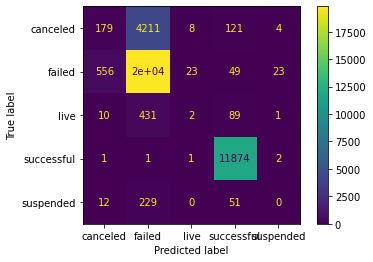

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['canceled', 'failed', 'successful', 'suspended']))

              precision    recall  f1-score   support

    canceled       0.24      0.04      0.07      4523
      failed       0.80      0.97      0.88     20462
  successful       0.97      1.00      0.99     11879
   suspended       0.00      0.00      0.00       292

   micro avg       0.85      0.86      0.85     37156
   macro avg       0.50      0.50      0.48     37156
weighted avg       0.78      0.86      0.81     37156



1. Building the model with 100 trees along with the accuracy score, confusion matrix, and classification report. The 100 trees is the basic number we are taking here.Then we have to calculate the accuracy, confusion matrix and the classification report using the syntax belox.

In [ ]:
n_estimators = 100 # This is the number of different trees to build; default was 100; we are increasing this number tenfold.
min_samples_split = 5 # Previously, we ran this with the default split of 2
criterion='entropy' 

In [ ]:
rf2 = RandomForestClassifier(verbose=1, n_estimators=n_estimators, min_samples_split=min_samples_split, criterion=criterion)
rf2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.7s finished


RandomForestClassifier(criterion='entropy', min_samples_split=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.849452094775664


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


              precision    recall  f1-score   support

    canceled       0.25      0.03      0.05      4523
      failed       0.80      0.98      0.88     20462
   succesful       0.00      0.00      0.00         0
   suspended       0.00      0.00      0.00       292

   micro avg       0.79      0.80      0.79     25277
   macro avg       0.26      0.25      0.23     25277
weighted avg       0.69      0.80      0.72     25277



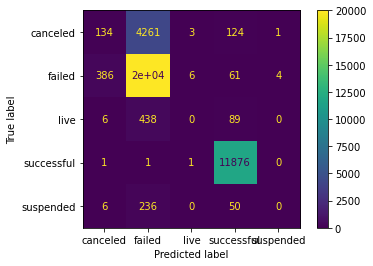

In [ ]:
y_pred = rf2.predict(X_test)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(rf2, X_test, y_test)
print(metrics.classification_report(y_test, y_pred, labels=['canceled', 'failed', 'succesful', 'suspended']))

2. Building the model with 1,000 trees and showing the accuracy score, confusion matrix and classification report. Here we have to chane the number of trees from 100 to 1000 and then we have to calculate the accuracy score, confusion matrix and classification report.

In [ ]:
n_estimators = 1000 
min_samples_split = 5 
criterion='entropy' 

In [ ]:
rf2 = RandomForestClassifier(verbose=1, n_estimators=n_estimators, min_samples_split=min_samples_split, criterion=criterion)
rf2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  7.3min finished


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=1000, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8502480829950383


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   19.8s finished


              precision    recall  f1-score   support

    canceled       0.26      0.03      0.05      4523
      failed       0.80      0.98      0.88     20462
   succesful       0.00      0.00      0.00         0
   suspended       0.00      0.00      0.00       292

   micro avg       0.79      0.80      0.79     25277
   macro avg       0.27      0.25      0.23     25277
weighted avg       0.70      0.80      0.72     25277



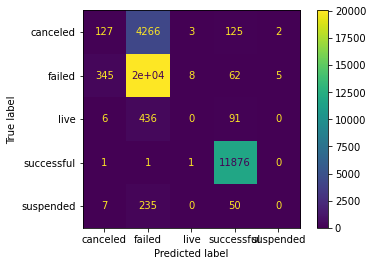

In [23]:
y_pred = rf2.predict(X_test)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(rf2, X_test, y_test)
print(metrics.classification_report(y_test, y_pred, labels=['canceled', 'failed', 'succesful', 'suspended']))

3. Comparing the both 100 tree model with the 1000 tree model.  
   Here we can say that the 100 tree is much better than the 1000 tree model because the 100 tree has the best accuracy when we compare the both. So 100 tree is better. 